#### Import Libraries
 


In [82]:
import pandas as pd
import re
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

#### Extract
Load the data files.
<li> salaries-by-college-type.csv  - CollegeSalaries
<li> College.csv - Colleges
<li> NationalUniversitiesRankings.csv - CollegeRankings
    
<li>Most-Recent-Cohorts-All-Data-Elements.csv - RecentCohorts (To used to clean up NaN values in dataset)

In [4]:
sal_college = pd.read_csv("salaries-by-college-type.csv")

In [5]:
fl_college = pd.read_csv("College.csv")

In [6]:
nu_Ranks = pd.read_csv("NationalUniversitiesRankings.csv", encoding='latin-1')

In [7]:
mr_Cohorts = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv", index_col=False, dtype='unicode', error_bad_lines=False)

### Examining the data sets 
Identifying volume of null values  

In [8]:
sal_college.head(1)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"


In [9]:
sal_college.isnull().sum()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
dtype: int64

In [10]:
fl_college.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [11]:
fl_collegeT = fl_college.rename(columns = {'Unnamed: 0' : 'Name'})
fl_collegeT.head(1)

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [12]:
fl_collegeT.isnull().sum()
 

Name           0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [13]:
nu_Ranks.head(1)

,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"


In [14]:
nu_Ranks.isnull().sum()

Name                     0
Location                 0
Rank                     0
Description              0
Tuition and fees         0
In-state                98
Undergrad Enrollment     0
dtype: int64

#### Transform the data sets
* Removing unneeded columns.
* Medging the data sets, eliminating spaces and special characters.
* Cleaning up NaN values.

In [15]:
#Trim the college salaries dataframe down to include only the 'School Name', 'Starting Median Salary', 'Mid-Career Median Salary'

sal_college_drop = sal_college.loc[:, ['School Name', 'Starting Median Salary', 'Mid-Career Median Salary']]
sal_college_drop

,School Name,Starting Median Salary,Mid-Career Median Salary
0,Massachusetts Institute of Technology (MIT),"$72,200.00","$126,000.00"
1,California Institute of Technology (CIT),"$75,500.00","$123,000.00"
2,Harvey Mudd College,"$71,800.00","$122,000.00"
3,"Polytechnic University of New York, Brooklyn","$62,400.00","$114,000.00"
4,Cooper Union,"$62,200.00","$114,000.00"
...,...,...,...
264,Austin Peay State University,"$37,700.00","$59,200.00"
265,Pittsburg State University,"$40,400.00","$58,200.00"
266,Southern Utah University,"$41,900.00","$56,500.00"
267,Montana State University - Billings,"$37,900.00","$50,600.00"


In [16]:
#Creating the column called 'merge_name". 
#This column will be used in the join/merge of the other datasets

sal_college_drop['merge_name'] = sal_college_drop.loc[:, ["School Name"]]
sal_college_drop['merge_name'] = sal_college_drop['merge_name'].str.lower()
sal_college_drop['merge_name'] = sal_college_drop['merge_name'].str.replace(r'\(.*\)','').str.replace(',','').str.replace('-', '').str.replace('.', '')
sal_college_drop

,School Name,Starting Median Salary,Mid-Career Median Salary,merge_name
0,Massachusetts Institute of Technology (MIT),"$72,200.00","$126,000.00",massachusetts institute of technology
1,California Institute of Technology (CIT),"$75,500.00","$123,000.00",california institute of technology
2,Harvey Mudd College,"$71,800.00","$122,000.00",harvey mudd college
3,"Polytechnic University of New York, Brooklyn","$62,400.00","$114,000.00",polytechnic university of new york brooklyn
4,Cooper Union,"$62,200.00","$114,000.00",cooper union
...,...,...,...,...
264,Austin Peay State University,"$37,700.00","$59,200.00",austin peay state university
265,Pittsburg State University,"$40,400.00","$58,200.00",pittsburg state university
266,Southern Utah University,"$41,900.00","$56,500.00",southern utah university
267,Montana State University - Billings,"$37,900.00","$50,600.00",montana state university billings


In [17]:
#Creating a new dataframe from the Colleges dataframe that contains only the 'Name', 'Private', 'Apps', 'Accept' columns.
fl_collegeTn = fl_collegeT.loc[:, 'Name':'Accept']

In [18]:
#create the new column "Acp_Rate(%)"
fl_collegeTn['Acp_Rate(%)'] = (fl_collegeTn['Accept']/fl_collegeTn['Apps']).round(2)

In [19]:
#view new data frame
fl_collegeTn

,Name,Private,Apps,Accept,Acp_Rate(%)
0,Abilene Christian University,Yes,1660,1232,0.74
1,Adelphi University,Yes,2186,1924,0.88
2,Adrian College,Yes,1428,1097,0.77
3,Agnes Scott College,Yes,417,349,0.84
4,Alaska Pacific University,Yes,193,146,0.76
...,...,...,...,...,...
772,Worcester State College,No,2197,1515,0.69
773,Xavier University,Yes,1959,1805,0.92
774,Xavier University of Louisiana,Yes,2097,1915,0.91
775,Yale University,Yes,10705,2453,0.23


In [20]:
#creating the merge column for the new college data frame
fl_collegeTn['merge_name'] = fl_collegeTn.loc[:, ["Name"]]
fl_collegeTn['merge_name'] = fl_collegeTn['merge_name'].str.lower()
fl_collegeTn['merge_name'] = fl_collegeTn['merge_name'].str.replace(r'\(.*\)','').str.replace(',','').str.replace('-', '').str.replace('.', '')
fl_collegeTn

,Name,Private,Apps,Accept,Acp_Rate(%),merge_name
0,Abilene Christian University,Yes,1660,1232,0.74,abilene christian university
1,Adelphi University,Yes,2186,1924,0.88,adelphi university
2,Adrian College,Yes,1428,1097,0.77,adrian college
3,Agnes Scott College,Yes,417,349,0.84,agnes scott college
4,Alaska Pacific University,Yes,193,146,0.76,alaska pacific university
...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,0.69,worcester state college
773,Xavier University,Yes,1959,1805,0.92,xavier university
774,Xavier University of Louisiana,Yes,2097,1915,0.91,xavier university of louisiana
775,Yale University,Yes,10705,2453,0.23,yale university


In [21]:
#Create a new dataframe containing the columns 'Name', 'Location', 'Rank', 'Tuition and fees' from the "CollegeRankings" dataframe
nu_Ranks = nu_Ranks.loc[:, ['Name', 'Location', 'Rank', 'Tuition and fees']]
nu_Ranks.head(1)

,Name,Location,Rank,Tuition and fees
0,Princeton University,"Princeton, NJ",1,"$45,320"


In [22]:
#creat the merge column
nu_Ranks['merge_name'] = nu_Ranks.loc[:, ["Name"]]
nu_Ranks['merge_name'] = nu_Ranks['merge_name'].str.lower()
nu_Ranks['merge_name'] = nu_Ranks['merge_name'].str.replace(r'\(.*\)','').str.replace(',','').str.replace('-', '').str.replace('.', '')
nu_Ranks

,Name,Location,Rank,Tuition and fees,merge_name
0,Princeton University,"Princeton, NJ",1,"$45,320",princeton university
1,Harvard University,"Cambridge, MA",2,"$47,074",harvard university
2,University of Chicago,"Chicago, IL",3,"$52,491",university of chicago
3,Yale University,"New Haven, CT",3,"$49,480",yale university
4,Columbia University,"New York, NY",5,"$55,056",columbia university
...,...,...,...,...,...
226,University of Massachusetts--Dartmouth,"North Dartmouth, MA",220,"$19,270",university of massachusettsdartmouth
227,University of Missouri--St. Louis,"St. Louis, MO",220,"$26,277",university of missourist louis
228,University of North Carolina--Greensboro,"Greensboro, NC",220,"$21,595",university of north carolinagreensboro
229,University of Southern Mississippi,"Hattiesburg, MS",220,"$16,094",university of southern mississippi


In [23]:
#dropping the initial school name columns in all three data frames 
sal_college_drop.drop(columns={"School Name"}, inplace=True)

In [24]:
fl_collegeTn.drop(columns={"Name"}, inplace=True) 

In [25]:
nu_Ranks.drop(columns={"Name"}, inplace=True) 

In [26]:
#merge all data frames to get the college master data frame
college_master = [sal_college_drop, fl_collegeTn, nu_Ranks]

In [27]:
df_CM = reduce(lambda  left,right: pd.merge(left,right,on=['merge_name'],
                                            how='outer'), college_master)

In [28]:
#re-naming the merge column to School name 
df_CM = df_CM.rename(columns = {'merge_name': 'School_Name'})


In [29]:
#previewing 
df_CM.head(3)

,Starting Median Salary,Mid-Career Median Salary,School_Name,Private,Apps,Accept,Acp_Rate(%),Location,Rank,Tuition and fees
0,"$72,200.00","$126,000.00",massachusetts institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"$75,500.00","$123,000.00",california institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"$71,800.00","$122,000.00",harvey mudd college,Yes,1377.0,572.0,0.42,NaN,NaN,NaN


In [30]:
#viewing the volume of nulls in the dataframe 
 df_CM.isnull().sum()

Starting Median Salary      817
Mid-Career Median Salary    817
School_Name                   0
Private                     306
Apps                        306
Accept                      306
Acp_Rate(%)                 306
Location                    852
Rank                        852
Tuition and fees            852
dtype: int64

#### Using the cohort data frame to improve the data set filing up null values

In [31]:
#viewing the cohort dataframe
mr_Cohorts.head(1)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,00100200,001002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343,1165,1288,2,0.7083,0.7287,2698


In [32]:
#renaming school the name column
mr_Cohorts = mr_Cohorts.rename(columns = {'INSTNM': 'School_Name'})
mr_Cohorts['School_Name'] = mr_Cohorts['School_Name'].str.lower()
mr_Cohorts['School_Name'] = mr_Cohorts['School_Name'].str.replace(r'\(.*\)','').str.replace(',','').str.replace('-', '').str.replace('.', '')
mr_Cohorts.head(1)

,UNITID,OPEID,OPEID6,School_Name,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,00100200,001002,alabama a & m university,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343,1165,1288,2,0.7083,0.7287,2698


In [33]:
#checking volume of missing starting median for each school
nullSal = df_CM.loc[df_CM['Starting Median Salary'].isnull()]

In [34]:
List_nullSal = nullSal.loc[:, ['School_Name']]
List_nullSal

,School_Name
269,abilene christian university
270,adelphi university
271,adrian college
272,agnes scott college
273,alaska pacific university
...,...
1081,shenandoah university
1082,university of massachusettsboston
1083,university of massachusettsdartmouth
1084,university of missourist louis


### Question 9
#### Write to the screen, a list of schools with missing data in the Acp_Rate(%) column?  (2 marks)

In [35]:
#checking schools with missing acceptance rate info
nullAcp = df_CM.loc[df_CM['Acp_Rate(%)'].isnull()]

In [36]:
List_nullAcp = nullAcp.loc[:, ['School_Name']]
List_nullAcp

,School_Name
0,massachusetts institute of technology
1,california institute of technology
3,polytechnic university of new york brooklyn
4,cooper union
5,worcester polytechnic institute
...,...
1081,shenandoah university
1082,university of massachusettsboston
1083,university of massachusettsdartmouth
1084,university of missourist louis


In [37]:
df_CM.head(5)

,Starting Median Salary,Mid-Career Median Salary,School_Name,Private,Apps,Accept,Acp_Rate(%),Location,Rank,Tuition and fees
0,"$72,200.00","$126,000.00",massachusetts institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"$75,500.00","$123,000.00",california institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"$71,800.00","$122,000.00",harvey mudd college,Yes,1377.0,572.0,0.42,NaN,NaN,NaN
3,"$62,400.00","$114,000.00",polytechnic university of new york brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$62,200.00","$114,000.00",cooper union,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#updating starting salary missing data using the cohorts dataframe
df_CM['Starting Median Salary'].fillna(mr_Cohorts['MD_EARN_WNE_P10'], inplace=True)

In [39]:
df_CM.head(5)

,Starting Median Salary,Mid-Career Median Salary,School_Name,Private,Apps,Accept,Acp_Rate(%),Location,Rank,Tuition and fees
0,"$72,200.00","$126,000.00",massachusetts institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"$75,500.00","$123,000.00",california institute of technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"$71,800.00","$122,000.00",harvey mudd college,Yes,1377.0,572.0,0.42,NaN,NaN,NaN
3,"$62,400.00","$114,000.00",polytechnic university of new york brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$62,200.00","$114,000.00",cooper union,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
 #updating acceptance rate missing data using the cohorts dataframe
 df_CM['Acp_Rate(%)'].fillna(mr_Cohorts['ADM_RATE_ALL'], inplace=True)

In [41]:
#viewing the df to see the starting salary and aceptance rate columns
df_CM.head(5)

,Starting Median Salary,Mid-Career Median Salary,School_Name,Private,Apps,Accept,Acp_Rate(%),Location,Rank,Tuition and fees
0,"$72,200.00","$126,000.00",massachusetts institute of technology,NaN,NaN,NaN,0.8986,NaN,NaN,NaN
1,"$75,500.00","$123,000.00",california institute of technology,NaN,NaN,NaN,0.9211,NaN,NaN,NaN
2,"$71,800.00","$122,000.00",harvey mudd college,Yes,1377.0,572.0,0.42,NaN,NaN,NaN
3,"$62,400.00","$114,000.00",polytechnic university of new york brooklyn,NaN,NaN,NaN,0.8087,NaN,NaN,NaN
4,"$62,200.00","$114,000.00",cooper union,NaN,NaN,NaN,0.9774,NaN,NaN,NaN


In [43]:
#writng the final file to csv 
df_CM.to_csv('df_CMFinal.csv', index=False)  

 #### Extracting and visualizing the TOP TEN (10) univeristies that give the best value, based on the highest starting salary for graduates of the various schools.

In [71]:
df_CM["Starting Median Salary"] = pd.to_numeric(df_CM["Starting Median Salary"], errors='coerce')

In [72]:
plot_order =df_CM.groupby('School_Name')['Starting Median Salary'].sum().sort_values(ascending=False).index.values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'virginia state university'),
  Text(1, 0, 'duke university'),
  Text(2, 0, 'university of sci and arts of oklahoma'),
  Text(3, 0, 'virginia wesleyan college'),
  Text(4, 0, 'montreatanderson college'),
  Text(5, 0, 'goucher college'),
  Text(6, 0, 'bentley college'),
  Text(7, 0, 'carsonnewman college'),
  Text(8, 0, 'university of marylandcollege park'),
  Text(9, 0, 'gonzaga university')])

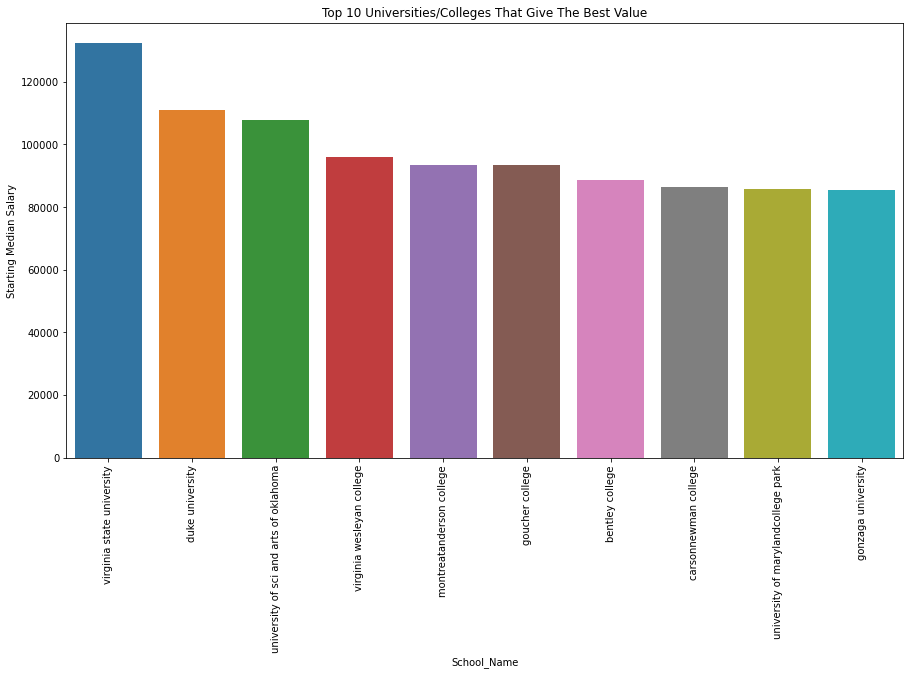

In [94]:
plt.figure(figsize = (15,8))
sns.barplot(x=df_CM['School_Name'], y=df_CM['Starting Median Salary'], data=df_CM, order=plot_order[0:10]).set_title('Top 10 Universities/Colleges That Give The Best Value')
plt.xticks(rotation=90)